In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sales = pd.read_csv('Sales.csv')

In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [25]:
# Mengubah tipe data kolom 'Date' menjadi tipe data datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Membuat kolom baru 'Year'
sales['Year'] = sales['Date'].dt.year

# Membuat kolom baru 'Month'
sales['Month'] = sales['Date'].dt.month_name()

# Membuat kolom baru 'Day'
sales['Day'] = sales['Date'].dt.day

In [26]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [27]:
# Memformat tanggal ke dalam format 'dd-mm-yyyy'
sales['Date'] = sales['Date'].dt.strftime('%d-%m-%Y')

In [28]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [29]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [30]:
sales['Unit_Cost'].median()

9.0

<b>Membuat grafik density untuk unit yang terjual beseta nilai mean dan mediannya</b>

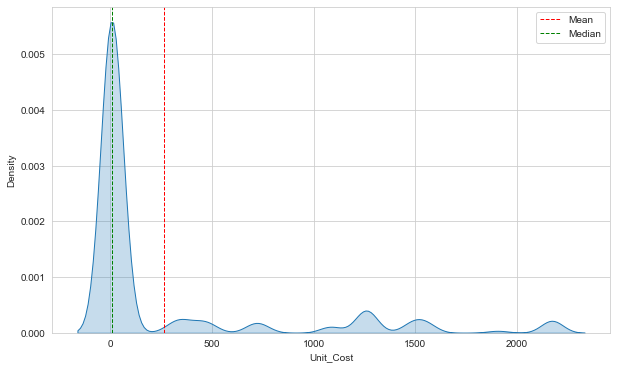

In [74]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=sales, x="Unit_Cost", shade=True)
plt.axvline(sales["Unit_Cost"].mean(), color='red', linestyle='dashed', linewidth=1, label="Mean")
plt.axvline(sales["Unit_Cost"].median(), color='green', linestyle='dashed', linewidth=1, label="Median")
plt.legend()
plt.show()

<b>Membuat boxplot jumlah order</b>

<AxesSubplot:>

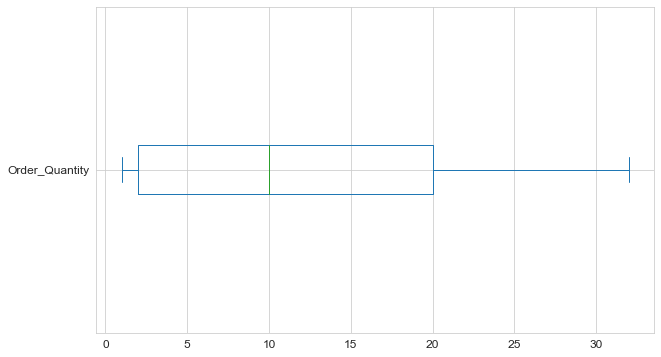

In [75]:
sales["Order_Quantity"].plot(kind='box',vert=False,figsize=(10,6), fontsize=12)

<b>Membuat grafik bar jumlah ermintaan berdasarkan sub kategori</b>

<AxesSubplot:title={'center':'Banyak Pemesanan Berdasarkan Sub Kategori'}, xlabel='Order_Quantity', ylabel='Sub_Category'>

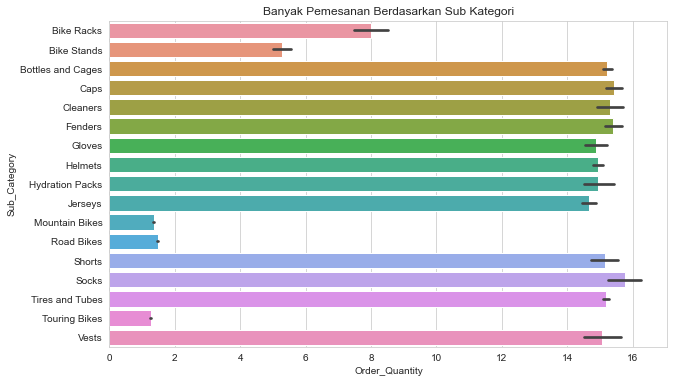

In [76]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.title("Banyak Pemesanan Berdasarkan Sub Kategori")
sns.barplot(x="Order_Quantity", y="Sub_Category", data=sales)

<b>Membuat top 5 states dengan jumlah pemesanan paling banyak</b>

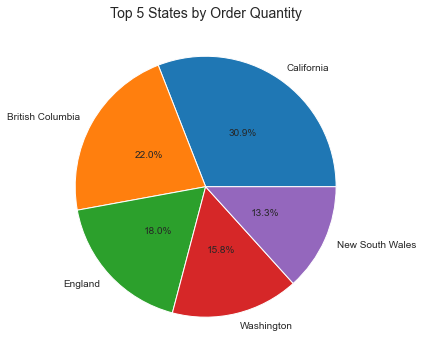

In [77]:
top_states = sales.groupby('State')['Order_Quantity'].sum().nlargest(5).reset_index()
sns.set_style("whitegrid")

pie, ax = plt.subplots(figsize=[10,6])
labels = top_states['State']
plt.pie(x=top_states['Order_Quantity'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Top 5 States by Order Quantity", fontsize=14);

<b>Membuat grafik bar profit di tiap negara</b>

<AxesSubplot:title={'center':'Banyak Profit di Setiap Negara'}, xlabel='Profit', ylabel='Country'>

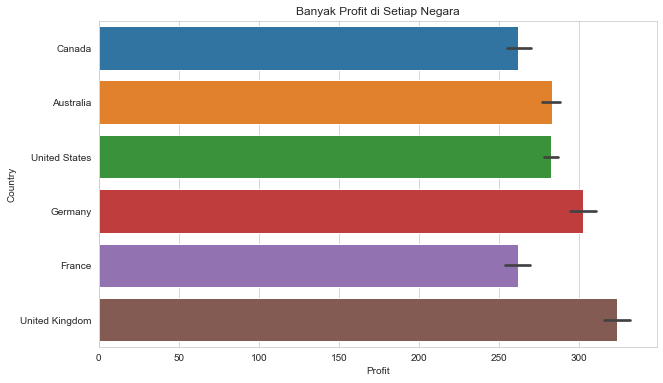

In [78]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.title("Banyak Profit di Setiap Negara")
sns.barplot(x="Profit", y="Country", data=sales)

<b>Membuat boxplot revenue berdasarkan negara</b>

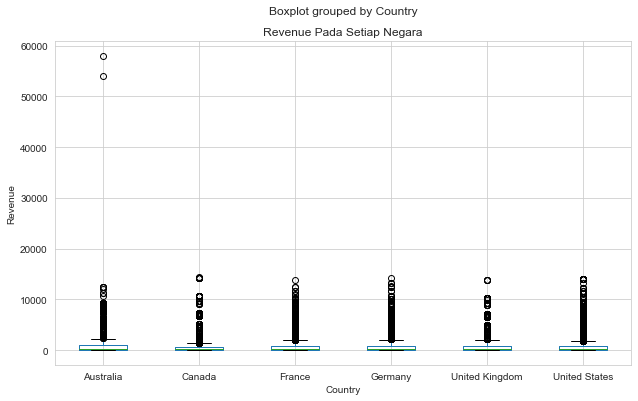

In [73]:
sales.boxplot(column='Revenue', by='Country', figsize=(10,6))
plt.title('Revenue Pada Setiap Negara')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

<b>Top 5 negara dengan jumlah order terbanyak</b>

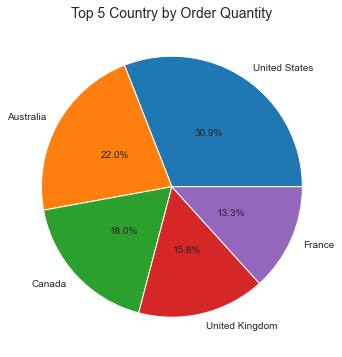

In [79]:
top_country = sales.groupby('Country')['Order_Quantity'].sum().nlargest(5).reset_index()
sns.set_style("whitegrid")

pie, ax = plt.subplots(figsize=[10,6])
labels = top_country['Country']
plt.pie(x=top_states['Order_Quantity'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Top 5 Country by Order Quantity", fontsize=14);

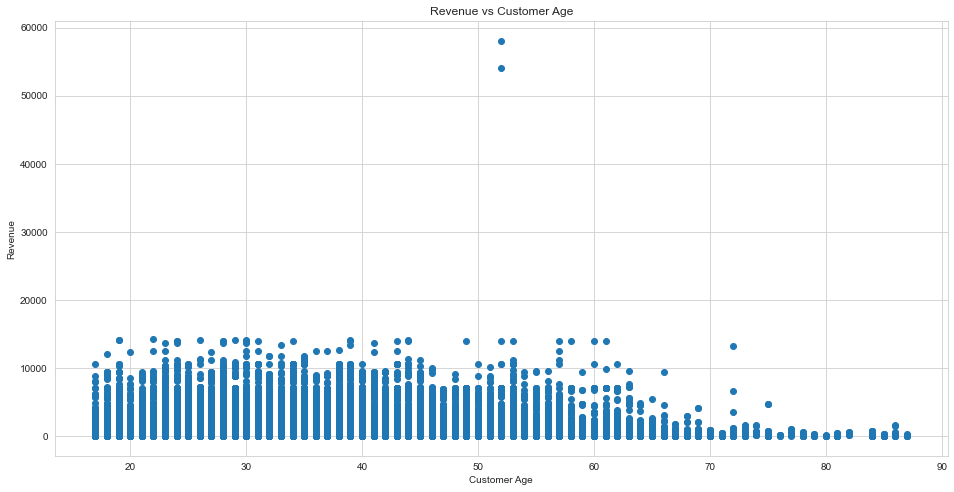

In [53]:
# Create a scatter plot of revenue vs customer age
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(sales['Customer_Age'], sales['Revenue'])

# Set the title and axis labels
ax.set_title('Revenue vs Customer Age')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Revenue')

# Show the plot
plt.show()

<b>Density plot Cost per Unit Cost</b>

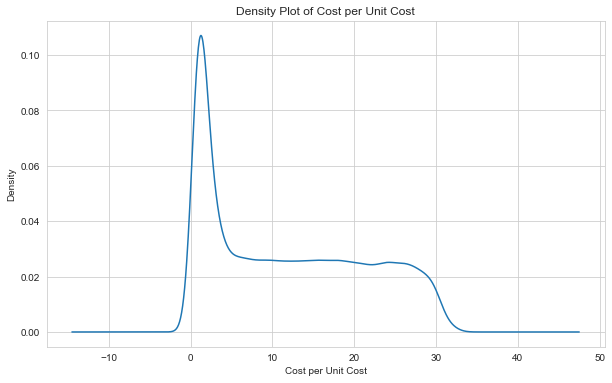

In [81]:
plt.figure(figsize=(10,6))
sales['Cost_Per_Unit'] = sales['Cost'] / sales['Unit_Cost']
sales['Cost_Per_Unit'].plot(kind='density')
plt.title('Density Plot of Cost per Unit Cost')
plt.xlabel('Cost per Unit Cost')
plt.ylabel('Density')
plt.show()

<b>Histogram Profit</b>

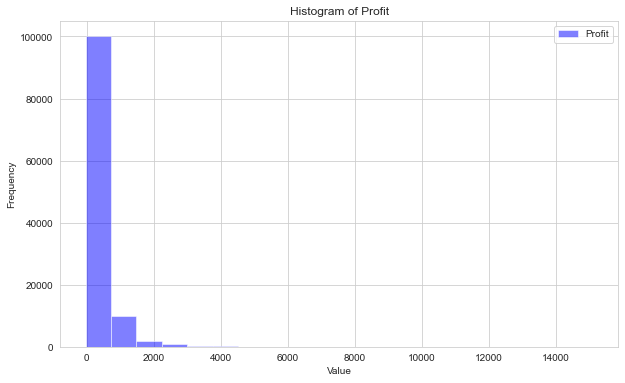

In [82]:
plt.figure(figsize=(10,6))
plt.hist(sales['Profit'], bins=20, color='blue', label='Profit', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.legend()
plt.show()

In [83]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  int64  
 14  Unit_Price        113036 non-null  int64  
 15  Profit            113036 non-null  int64  
 16  Cost              11

<b>Analisis negara mana saja yang perlu untuk meningkatkan/menurunkan penjualan</b>

In [98]:
country_sales = sales.groupby('Country')['Revenue'].sum().reset_index()
country_sales = country_sales.sort_values('Revenue', ascending=False)
country_sales['Sales_Percentage'] = (country_sales['Revenue'] / country_sales['Revenue'].sum()) * 100
#Suatu negara dianggap profit jika Sales_Percentage > 15%
threshold = 15
top_countries = country_sales[country_sales['Sales_Percentage'] > threshold]
bottom_countries = country_sales[country_sales['Sales_Percentage'] < threshold]

print("Negara yang memiliki persentase penjualan tinggi:")
print(top_countries)

print("Negara yang memiliki persentase penjualan rendah:")
print(bottom_countries)

Negara yang memiliki persentase penjualan tinggi:
         Country   Revenue  Sales_Percentage
5  United States  27975547         32.807806
0      Australia  21302059         24.981596
Negara yang memiliki persentase penjualan rendah:
          Country   Revenue  Sales_Percentage
4  United Kingdom  10646196         12.485130
3         Germany   8978596         10.529483
2          France   8432872          9.889495
1          Canada   7935738          9.306490
